<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [2]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Общая информация: 
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

На начальном этапе ясно: файл содержит данные по 23699 объектам недвижимости, каждый из которых описывается 22 признаками. У некоторых признаков есть пропущенные значения, которые необходимо обработать.

## Предобработка данных

In [6]:
#посмотрим количество пропусков в каждом столбце
display(data.isna().sum().sort_values())

#Столбец [locality_name]
display(len(data['locality_name'].unique()))
data['locality_name'] = data['locality_name'].str.lower()
#Возможно есть проблема с буквой Ё
#display(data['locality_name'].unique())
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
#Действительно ситуация изменилась, убрали 34 дубля
display(len(data['locality_name'].unique()))
# Удалим строки без города, они будут мешать в анализе и даже пользователям такие объявления не нужны, так как не понятно, где эта квартира.
data = data.dropna(subset=['locality_name'])

#В столбце [balcony] много занчений NaN,скорее все, где балкон отсутствует, там вместо 0 стоит NaN
data['balcony'] = data['balcony'].fillna(0)

#Столбец ['is_apartment'] имеет булев тип, т.е обозначение аппартаменты это или нет, так же в апартаментаx значения NaN
#Скорее всего люди не знают разницы между апартаментами и квартирами,поэтому при заполнении формы пропускали эти пункты
#а владельцы апартаментов точно в курсе, что у них апартаменты
#Поэтому заменим пустые значения на False 
#display(data['is_apartment'].unique())
data['is_apartment'] = data['is_apartment'].fillna(False)

#Столбец [floors_total] 
median = data.groupby('locality_name').agg({'floors_total' : 'median'})
for element in data['locality_name'].unique():
    data.loc[data['locality_name'] == element, 'floors_total'] = data.loc[data['locality_name'] == element, 'floors_total'].fillna(median.loc[element, 'floors_total'])

#Пропуски в столбце [living_area] (жилая площадь в квадратных метрах) и [kitchen_area] (площадь кухни в квадратных метрах)
#Посчитаем какую часть занимает жилая площадь от всей площади квартиры
part_living_area = (data['living_area'] / data['total_area']).mean()
print("Площадь жилого помещения занимает: {:.1%}".format(part_living_area))
#Посчитаем какую часть занимает площадь кухни от всей площади
part_kitchen_area = (data['kitchen_area'] / data['total_area']).mean()
print("Площадь кухни занимает: {:.1%}".format(part_kitchen_area))
#Площадь жилого помещения в среднем занимает: 56.5%
#Площадь кухни занимает: 18.7%
#сделаем замену пропусков произведением общей площади на часть, которую занимают жилая площадь и кухня
data['living_area'] = data['living_area'].fillna(data['total_area'] * 0.565)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * 0.187)     

# необходимо сделать группировку по локации и выделить среднее значение 
# расстояния до центра города  для каждой локации 
#и вставить эти значения вместо нулей по этим локациям
#вводим переменную, которая нам дает среднее значение  
median_locality_name = data.groupby('locality_name').agg({'cityCenters_nearest' : 'median'})
for element in data['locality_name'].unique():
    data.loc[data['locality_name'] == element, 'cityCenters_nearest'] = data.loc[data['locality_name'] == element, 'cityCenters_nearest'].fillna(median_locality_name.loc[element, 'cityCenters_nearest'])

    
#Столбец [ceiling_height]
median_new = data.groupby('floors_total').agg({'ceiling_height' : 'median'})
for element in data['floors_total'].unique():
    data.loc[data['floors_total'] == element, 'ceiling_height'] = data.loc[data['floors_total'] == element, 'ceiling_height'].fillna(median_new.loc[element, 'ceiling_height'])
data = data.drop(index=[11575])



list_to_int = ['last_price', 'floors_total', 'balcony', 'floor']

for column in list_to_int:
    data[column] = data[column].astype('int')
#Округляем до 1 знака после запятой:    
list_to_float_1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']

for column in list_to_float_1:
    data[column] = data[column].round(1)

display(data.isna().sum().sort_values())
#Дубликатов нет
data.duplicated().sum()
data.info()



total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

365

331

Площадь жилого помещения занимает: 56.5%
Площадь кухни занимает: 18.7%


total_images                0
locality_name               0
balcony                     0
kitchen_area                0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
living_area                 0
days_exposition          3180
cityCenters_nearest      4864
parks_around3000         5510
ponds_around3000         5510
airports_nearest         5534
ponds_nearest           14565
parks_nearest           15585
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23649 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23649 non-null int64
last_price              23649 non-null int64
total_area              23649 non-null float64
first_day_exposition    23649 non-null object
rooms                   23649 non-null int64
ceiling_height          23649 non-null float64
floors_total            23649 non-null int64
living_area             23649 non-null float64
floor                   23649 non-null int64
is_apartment            23649 non-null bool
studio                  23649 non-null bool
open_plan               23649 non-null bool
kitchen_area            23649 non-null float64
balcony                 23649 non-null int64
locality_name           23649 non-null object
airports_nearest        18115 non-null float64
cityCenters_nearest     18785 non-null float64
parks_around3000        18139 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000      

Исправление значений NaN: 
- Столбец [locality_name] - была проблема с буквами Ё и Е. По исправлению избавились от 34 дубликатов. 
- Столбец [floors_total] -  Данный столбец содержал пропуски.  Заполним тогда значения с помощью расчета медианы для каждой группы окрестности, так как чаще всего дома в одном районе строят по одному типу. Все NaN по датафрейму заполнены, явно некорректные значения откорректированы.
- Столбец [living_area] и [kitchen_area] - посчитаем какую часть в среднем занимает жилая площадь от всей площади квартиры и какую часть в среднем занимает площадь кухни от всей площади. Площадь жилого помещения в среднем занимает: 56.5%. Площадь кухни занимает: 18.7%. Сделаем замену пропусков произведением общей площади на часть, которую занимают жилая площадь и кухня.
- Столбец [balcony] много занчений NaN, скорее всего, люди неимеющие балконов ничего не ставили вместо 0. Поэтому все значения NaN были заменены 0
- Столбец [is_apartment] - расстояние до ближайшего аэропорта в метрах (м). Причиной может быть следующее: не многие люди знали разницы между апартаментами и квартирами, это вело к тому, что люди, которые продавали квартиры, при заполнении формы для создания объявления просто пропускали эти пункты, т.к. особо не понимали, что их спрашивали. И наоборот, владельцы апартаментов точно в курсе, что у них апартаменты (раз уж они их приобрели, значит, они разбираются в этом вопросе), поэтому по ним данные оказались заполненными.
- Столбец [ceiling_height] в среднем высота потолков в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра. поэтому возьмем максимальную высоту потолка - 4 метра, а минимальную 2.4 метра. Число этажей в доме: пропущено 0,4% значений. Была взята медиана ceiling-height от кол-ва этажей в доме, так как в нашей стране распространено типовое жилье. Также после замены осталось одно значение NaN, эта строчка была удалена, чтобы избавиться от всех NaN.

Количество NaN по days_exposition : 3181. Довольно важный параметр. Но "среднее"/"медиана" не подойдут или заполняют малое количество пропусков. Расстояние до центра города: пропущено 23,3% значений. При этом из всех квартир Санкт-Петербурга отсутствует информация по расстоянию до центра для 0,4% квартир. Поскольку трудоемкость заполнения таких пропущенных значений велика по сравнению с их общим количеством, оставим данные пропущенные значения без изменений. Поэтому оставляем эти столбец в покое. 
Пропуски в столбцах, которые не нужны в дальнейшем было принято оставить:
• airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
• parks_around3000 — число парков в радиусе 3 (км)
• parks_nearest — расстояние до ближайшего парка (м)
• ponds_around3000 — число водоёмов в радиусе 3 (км)
• ponds_nearest — расстояние до ближайшего водоёма (м)
Были скорректированы столбцы 'last_price', 'floors_total', 'balcony', 'floor'  в тип int. Для того, чтобы таблица легче воспринималась на глаз.  Нужный тип значения перевелся методом astype(). Аргумент ('int') метода astype() означает, что значение нужно перевести в целое число.

## Расчёты и добавление результатов в таблицу

In [7]:
#Добавление столбца, который показывает цену квадратного метра
data['price_per_meter'] = data['last_price']/data['total_area']
#Добавление столбцов, которые показывают день недели, месяц и год публикации объявления
data['time'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
data['weekday'] = data['time'].dt.weekday
data['month'] = data['time'].dt.month
data['year'] = data['time'].dt.year
del data['first_day_exposition']
#Введ функции для определения этажа квартиры
def floor(data):
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'
        
data['floors_group'] = data.apply(floor, axis=1)
#Столбец отношения жилой к общей площади
data['ratio_living_total'] = data['living_area']/data['total_area']
#Столбец отношения площади кухни к общей
data['ratio_kitchen_total'] = data['kitchen_area']/data['total_area']
display(data)


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_nearest,days_exposition,price_per_meter,time,weekday,month,year,floors_group,ratio_living_total,ratio_kitchen_total
0,20,13000000,108.0,3,2.7,16,51.0,8,False,False,...,755.0,NaN,120370.370370,2019-03-07,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,1,2.8,11,18.6,1,False,False,...,NaN,81.0,82920.792079,2018-12-04,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2,2.6,5,34.3,4,False,False,...,574.0,558.0,92785.714286,2015-08-20,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,3,2.6,14,89.8,9,False,False,...,234.0,424.0,408176.100629,2015-07-24,4,7,2015,другой,0.564780,0.186792
4,2,10000000,100.0,2,3.0,14,32.0,13,False,False,...,48.0,121.0,100000.000000,2018-06-19,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.8,3,3.7,5,73.3,3,False,False,...,381.0,NaN,72496.263079,2017-03-21,1,3,2017,другой,0.547833,0.103139
23695,14,3100000,59.0,3,2.6,5,38.0,4,False,False,...,NaN,45.0,52542.372881,2018-01-15,0,1,2018,другой,0.644068,0.144068
23696,18,2500000,56.7,2,2.8,3,29.7,1,False,False,...,NaN,NaN,44091.710758,2018-02-11,6,2,2018,первый,0.523810,0.186949
23697,13,11475000,76.8,2,3.0,17,43.4,12,False,False,...,196.0,602.0,149414.062500,2017-03-28,1,3,2017,другой,0.565104,0.303385


Вывод:
Были расширены границы таблицы, произведены расчеты и добавлены все нужные столбцы

## Исследовательский анализ данных

Исследование площади, цены, числа комнат, высоты потолков:

In [8]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23649.000000,2.364900e+04,23649.000000,23649.000000
mean,60.327333,6.540985e+06,2.070066,2.747258
std,35.661585,1.089661e+07,1.078626,0.994289
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.600000
75%,69.700000,6.799000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


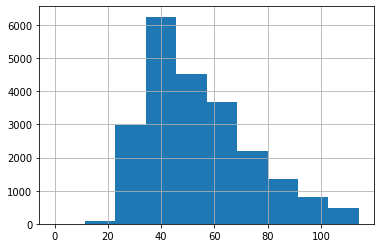

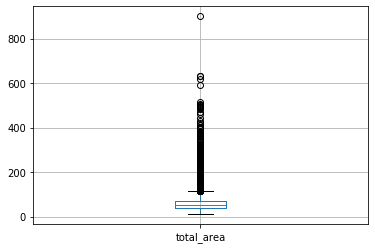

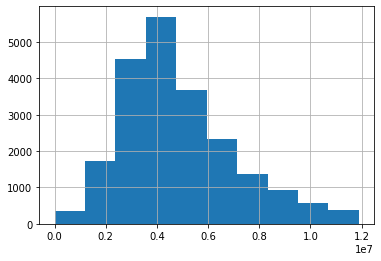

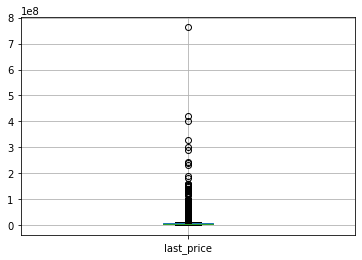

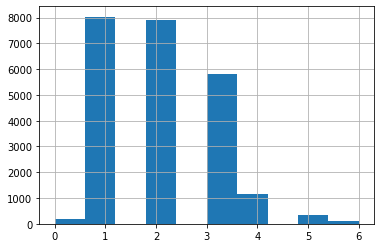

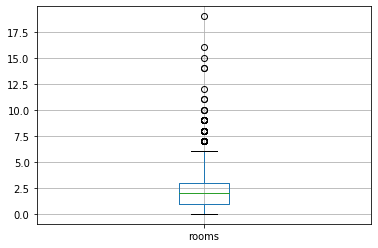

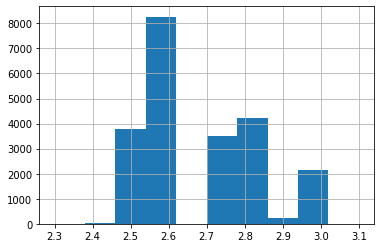

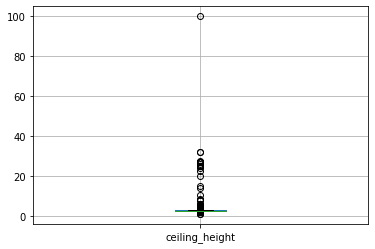

In [9]:
col = ['total_area', 'last_price', 'rooms', 'ceiling_height']
def new_print(data, col):
    quantiles = data[col].quantile([0.25, 0.75])
    IQR = quantiles.iloc[1] - quantiles.iloc[0]
    data[col].hist(range=(max(0, quantiles.iloc[0] - 1.5 * IQR), quantiles.iloc[1] + 1.5 * IQR))
    plt.show()
    data.boxplot(col)
    plt.show()

for col in data[col]: 
    new_print(data, col)
    

[(0, 15000000)]

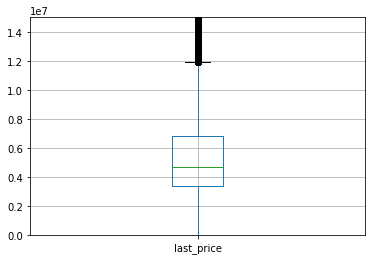

In [10]:
data.boxplot('last_price').set(ylim=(0,15000000))

Вывод: 

Средняя квартира, выставленная на продажу, имеет следующие характеристики: это 2-комнатная квартира площадью 52 кв. м с потолками 2,65 м, проданная по цене 4,65 млн рублей.
Из гистограммы стобца [total_area] - площадь квартиры в квадратных метрах видно, что самые частые значения это примерно от 35 до 60, самый большой пик находится в районе 40, очень мало значений после 150, но отдельные выбросы есть и после 200. Столбец [last_price]: цена на квартиры лежит в промежутке от 1 до 12 млн. Большая часть квартир продается за цену в промежутке между 3 и 6 млн.  При увеличении маштаба видно что выбросы начинаются посе 12 млн. Столбец [rooms] больше всего однокомнатных и двукомнатных квартир. Очень мало квартир с кол-вом комнат более 6. Есть отдельные выбросы и после значения 6. Есть и квартиры с 19-ью комнатами. Столбец [ceiling_height] -  квартиры, в большинстве своем, имеют потолки от 2,5-2,75м (самый популярный вариант) до 3,2м. Остальные случаи - эксклюзивы. 

Аномальные характеристики квартир из представленного набора данных:
7-комнатная квартира или больше
площадью более 114,3 кв. м
с потолками менее 2,25 м или более 3,05 м
по цене более 12 млн рублей


Исследование количества времени для продажи квартиры:

count    20469.000000
mean       180.759441
std        219.781470
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

95.0
180.75944110606284


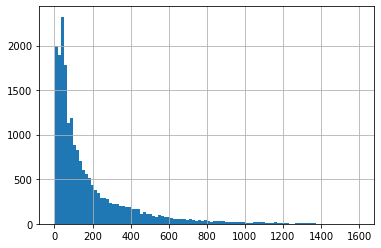

In [11]:
#Построим гистограмму и найдем медианное и среднее значения и изучим данные:
data['days_exposition'].hist(bins = 100, range = (1, 1600))
display(data['days_exposition'].describe())
print(data['days_exposition'].median())
print(data['days_exposition'].mean())

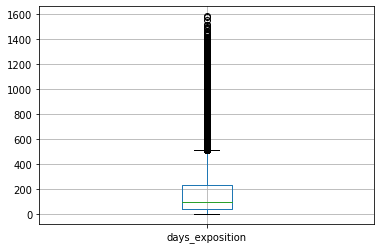

In [12]:
data.boxplot('days_exposition')

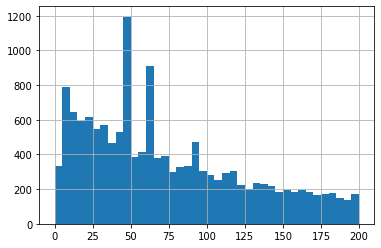

In [13]:
data.query('days_exposition < 400')['days_exposition'].hist(bins = 40, range = (0, 200))

Вывод:
Из полученных данных видно большая часть квартир продавалась в первые 50 дней, некоторые квартиры продаются и больше года, но таких меньше. Есть вероятность, что это могут быть объявления, которые забыли снять. При детальном рассмотрении видно, что самый пик продаж приходится на 15, 45 и 60 день продажи. Вполне возможно, что раз в 15 дней или на почту продавцу приходит вопрос, продал ли он квартиру, он заходит и делает соответствующую пометку, или ему звонит оператор и по телефону задает тот же вопрос и закрывает/не закрывает объявление согласно полученной информации. Таким образом, учитывая то, что многие самостоятельно не закрывают объявления, что большая часть квартир продается в пределах 60 дней с момента публикации объявления и что проверка производится раз в 15 дней, имеем такие вот данные. 
Исходя из метода describe, межквартильный размах - от 45 до 232 дней, исходя же из метода boxplot - диаграмма размаха у нас от минимального значения до примерно 500 дней. Значит необоснованно быстрых значений у нас нет, а необоснованно долгие - от 500 дней и выше. Значит нормальные значения у нас лежат от 1 до 500 

Исключение редких и выбивающихся значений: 

,last_price,total_area,rooms,days_exposition
last_price,1.000000,0.723931,0.461245,0.046214
total_area,0.723931,1.000000,0.802162,0.093682
rooms,0.461245,0.802162,1.000000,0.072025
days_exposition,0.046214,0.093682,0.072025,1.000000


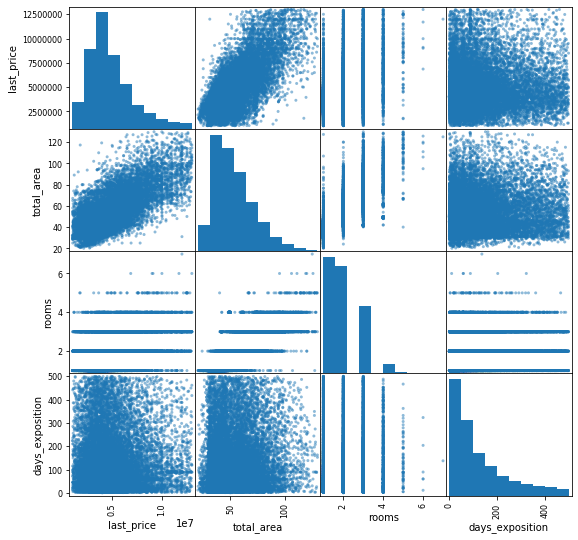

In [14]:
#Избавимся от данных ненужные значений и построим новые 
data_new = data.query('20 < total_area < 130 and 1 <= rooms <= 7 and 1000000 < last_price < 13000000 and days_exposition < 500 ')

data_new_multi = data_new.loc[:, ['last_price','total_area', 'rooms','days_exposition']]
display(data_new_multi.corr())
_=pd.plotting.scatter_matrix(data_new_multi, figsize=(9, 9))

Вывод
- Больше продано квартир с низкой стоимостью и маленькой площадью.
- Стоимость высокая у квартир с 6 и 7 комнатами и их очень мало. В основном, это квартиры с меньшим количеством комнат.
- Цена квартиры и площадь имеет малое влияние на длительность её продажи.
- Чем больше квартира, тем выше стоимость.
- Чем больше площадь, тем больше комнат в квартире.

Исследование факторов, которые больше всего влияют на стоимость квартиры. Зависит ли цена от площади, числа комнат, удалённости от центра. Зависят цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.723931,0.461245,-0.368354
total_area,0.723931,1.000000,0.802162,-0.157608
rooms,0.461245,0.802162,1.000000,-0.110916
cityCenters_nearest,-0.368354,-0.157608,-0.110916,1.000000


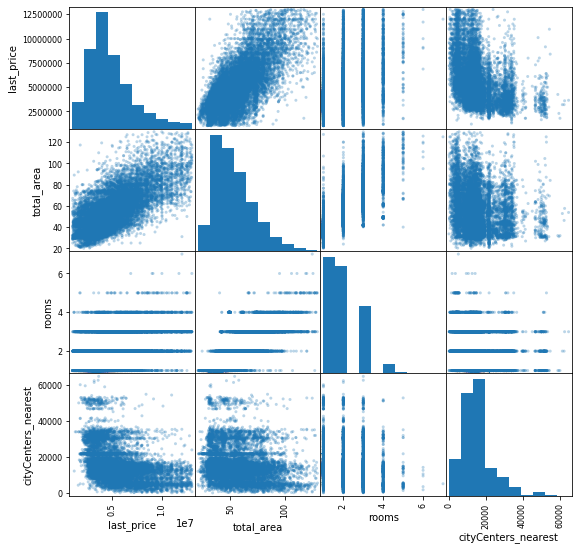

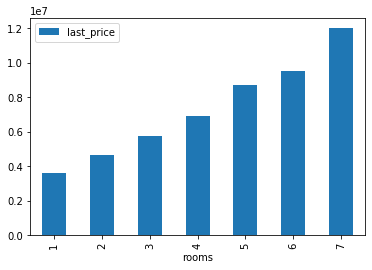

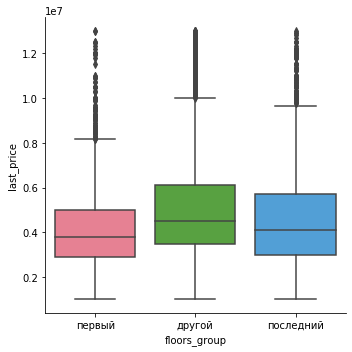

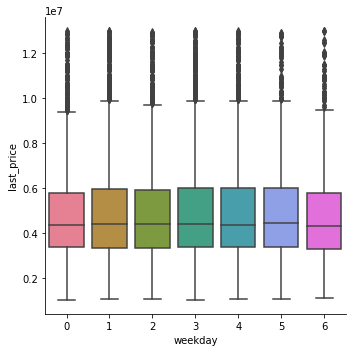

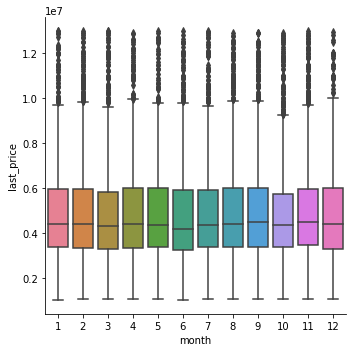

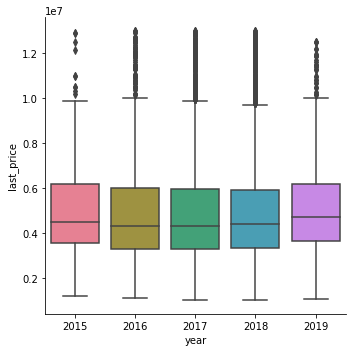

In [15]:
import seaborn as sns
data_price = data_new.loc[:, ['last_price', 'total_area',  'rooms', 'cityCenters_nearest']]
display(data_price.corr())
pd.plotting.scatter_matrix(data_price, figsize=(9, 9), alpha=0.3)

pivot_group_1 = data_new.pivot_table(index='rooms', values='last_price', aggfunc='median')
pivot_group_1.plot(y='last_price', kind ='bar')
#pivot_group_2 = data_new.pivot_table(index='total_area', values='last_price', aggfunc='median')
#pivot_group_2.plot(y='last_price', kind ='bar', figsize=(20, 20)).set(xlim = (20, 100))
for column in ['floors_group', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=data_new, palette='husl')


По матрица диаграмм рассеяния выше видно:
- Чем больше комнат, тем выше цена - так продолжается до 7 комнат (включительно)
- Высокие цены за квартиры находятся только в области ближе к центру города
- Чем больше квартира, тем выше стоимость

Факторы, влияющие на стоимость квартиры:
Наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью (коэфф. корреляции 0,72).
Расстояние до центра города также, очевидно, влияет на стоимость квартиры, но обратно пропорционально и не так сильно (коэфф. корреляции -0,37).
Стоимость квартиры также напрямую зависит от числа комнат: чем их больше, тем квартира дороже. Но это верно, пока число комнат не превышает четырех: 5- или 6-комнатные квартиры могут быть проданы дешевле 4-комнатных, и вызвано это скорее всего отсутствием спроса.
Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.
По дням недели:
цена за кв.метр в объявлениях, которые разместили во вторник, четверг, пятницу и субботу дороже, чем в другие дни.
По месяцам:
Квартиры дешевеют в марте и октябре.
По годам:
Самые дорогие квартиры были в 2015 и 2019 году, между этими годами квартиры падают в цене 
День недели, месяц и год публикации объявления не играют значимой роли на стоимость, по которой объект недвижимости будет продан. 

Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья:

In [16]:
#price_per_median_count = data_new.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'median'])
#price_per_median_count.columns = ['count', 'median']
#price_per_median_count.sort_values('count', ascending=False).head(10)
locality_pivot_table = data_new.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
display(locality_pivot_table)
#самая высокая стоимость
display(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()])
#самая низкая стоимость
display(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()])


,count,mean
locality_name,,
санкт-петербург,11294,104809.629464
поселок мурино,491,85281.128584
поселок шушары,381,77620.233739
всеволожск,300,66842.545753
колпино,292,74671.693815
поселок парголово,282,89480.874532
пушкин,261,99673.409049
деревня кудрово,250,92347.325018
гатчина,240,68514.534892


,count,mean
locality_name,,
санкт-петербург,11294,104809.629464


,count,mean
locality_name,,
выборг,189,57607.565079


Вывод:
самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге ('locality_name'). Выяснить, какая область входит в центр: 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.208

64.857

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


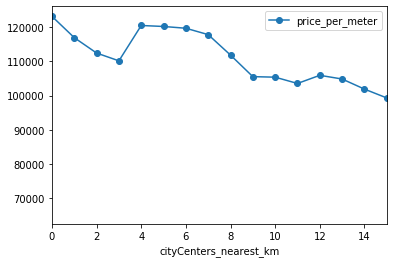

In [17]:
#переведем м в километры
data_new['cityCenters_nearest_km'] = data_new['cityCenters_nearest']/1000
display(data_new['cityCenters_nearest_km'].min()) # - 0,181 км
display(data_new['cityCenters_nearest_km'].max()) # - 65 км
#Заполним пропуски любой цифрой, которой у нас нет(например, 100)
data_new['cityCenters_nearest_km'] = data_new['cityCenters_nearest_km'].fillna(100)
# округим путем измены типа данных на int
data_new['cityCenters_nearest_km'] = data_new['cityCenters_nearest_km'].astype('int')
#display(data['cityCenters_nearest_km'].unique())
#display(data['locality_name'].unique())
data_new_1 = data_new.query('locality_name == "санкт-петербург"')
#display(data_new_1)
#сделаем срез по локации СПб и исключим пропуски, которые заполнили нулями, постороим сводную зависимости цены от километража
pivot_table_km = data_new_1.pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_meter', aggfunc = 'mean')
#построим график
pivot_table_km.plot(style='o-', xlim=(0, 15))

Вывод:
Из графика видно, что характер изменения цен на квартиры меняются примерно до 9 км, а далее цена очень медленно падает, то есть за центром цены практически одинаковые. Поэтому можно сделать вывод, что радиус центра равен примерно 9 км.

,total_area,last_price,rooms,ceiling_height
count,11294.000000,1.129400e+04,11294.000000,11294.000000
mean,54.443625,5.641508e+06,1.962546,2.726766
std,19.139981,2.206633e+06,0.901368,0.706487
min,20.100000,1.200000e+06,1.000000,1.000000
25%,40.000000,4.000000e+06,1.000000,2.600000
50%,50.000000,5.000000e+06,2.000000,2.600000
75%,65.000000,6.760000e+06,3.000000,2.800000
max,129.800000,1.299900e+07,7.000000,27.500000


,price_per_meter,total_area,rooms,ceiling_height
price_per_meter,1.000000,-0.146183,-0.327547,0.061362
total_area,-0.146183,1.000000,0.794019,0.084125
rooms,-0.327547,0.794019,1.000000,0.024796
ceiling_height,0.061362,0.084125,0.024796,1.000000


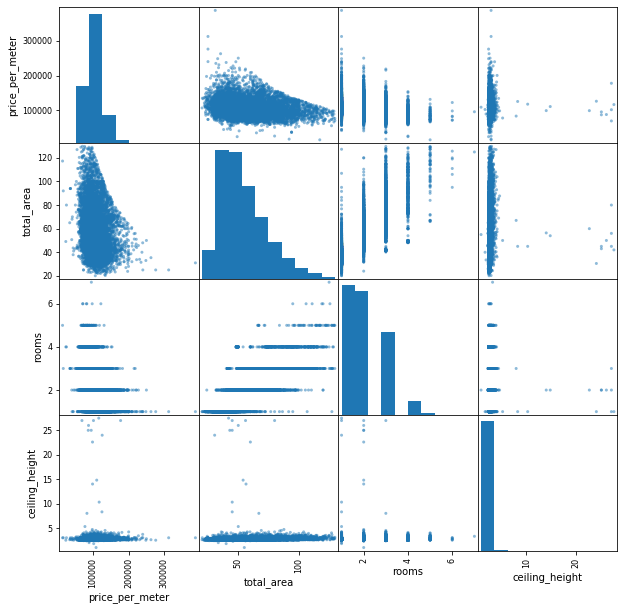

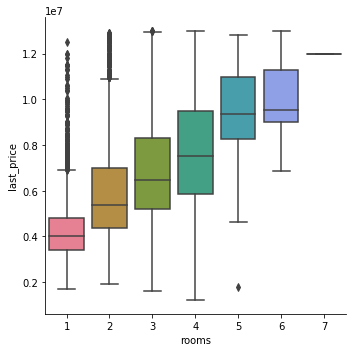

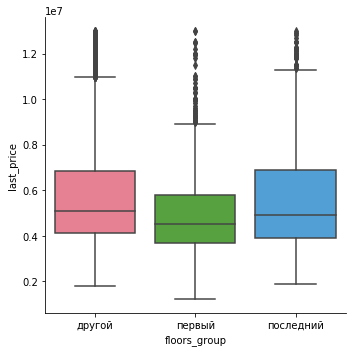

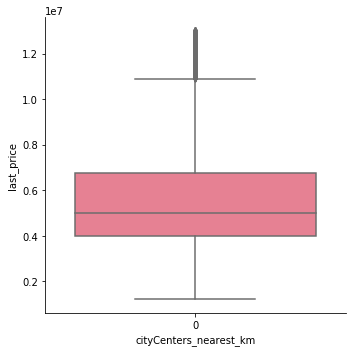

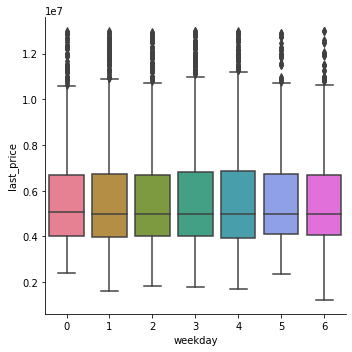

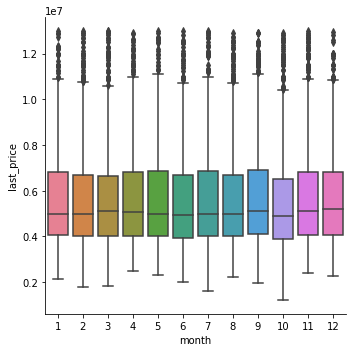

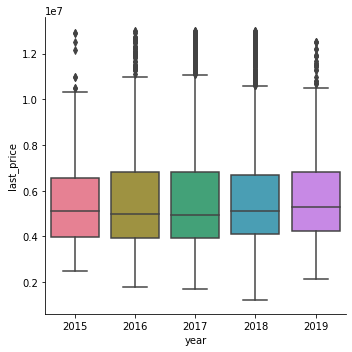

In [19]:
display(data_new_1[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe())
data_new_1 = data_new_1.query('1000000 < last_price < 13000000')
spb_center = data_new_1[(data_new_1['cityCenters_nearest_km'] <= 8) & (data_new_1['locality_name'] == 'санкт-петербург')]
spb_center_new = data_new_1.loc[:, ['price_per_meter','total_area','rooms','ceiling_height']]
display(spb_center_new.corr())
_=pd.plotting.scatter_matrix(spb_center_new, figsize=(10, 10))
for column in ['rooms', 'floors_group', 'cityCenters_nearest_km', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=spb_center, palette='husl')

- С увеличением площади, увеличиваетя число комнат и уменьшается цена за кв.метр.
- Чем больше комнат, тем больше площадь и меньше цена за кв.метр.
- Чем выше потолки, тем больше площадь и меньше цена за кв.метр.
Средняя квартира, выставленная на продажу в центре Санкт-Петербурга, имеет следующие характеристики: это 2-комнатная квартира площадью 51,2 кв. м с потолками 2,60 м, проданная по цене 5,2 млн рублей.

Факторы, влияющие на стоимость квартиры:

Зависимость стоимости квартиры от числа комнат в центре Санкт-Петербурга сильнее: здесь больше платежеспособного спроса на 5-комнатные квартиры, что приводит к прямо пропорциональной зависимости цены от числа комнат. Другими словами, 5-комнатные квартиры в центре Санкт-Петербурга, как правило, будут продаваться дороже, чем 4-комнатные.
Кроме того, в центре города наблюдается явно выраженная зависимость от этажа квартиры: квартира на последнем этаже в среднем будет стоить дороже, чем на первом. 
Чем дальше от центра города, тем в среднем квартира будет стоить дешевле: в среднем разница в стоимости между первым и восьмым километром от центра может достигать 2 млн руб.
Квартиры, объявления о продаже которых публиковались по воскресеньям, продавались в среднем по более высокой цене. То же верно и для объявлений, опубликованных в начале осени, в период 2014 гг.: в среднем такие квартиры продавались дороже.

## Общий вывод

Была изучена полученная информация - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

Выяснили, что почти половину значений занимает площадь квартир около 52 квадратов. Избавились от редких значений до 20 кв.м и от 130 кв.м. Чаще всего люди могут себе позволить купить квартиру около 4 млн, половина приобретений -это квартиры до 5 млн, но есть и отдельные богатые клиенты, которые могут приобрести квартиру и за более, чем 500 млн. Избавились от значений цены от 13 млн. Чаще это двукомнатные квартиры. Интервал комнат от 1 до 19 комнат. Тут от редких значений тоже избавились -квартиры от 7 комнат. При помощи диаграммы размаха, выявили, что четверть квартир продают за 45 дней - довольно-таки быстро, а есть и дольше, 420 дней - а это уже больше года (долго).Избавились от значений с 500 дней. В среднем люди продают квартиру за 95 дней.

Исследовали факторы, влияющие на стоимость квартиры.

Наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью (коэфф. корреляции 0,72). Расстояние до центра города также, очевидно, влияет на стоимость квартиры, но обратно пропорционально и не так сильно (коэфф. корреляции -0,37). Стоимость квартиры также напрямую зависит от числа комнат: чем их больше, тем квартира дороже. Но это верно, пока число комнат не превышает четырех: 5- или 6-комнатные квартиры могут быть проданы дешевле 4-комнатных, и вызвано это скорее всего отсутствием спроса. Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах. По дням недели: цена за кв.метр в объявлениях, которые разместили во вторник, четверг, пятницу и субботу дороже, чем в другие дни. По месяцам: Квартиры дешевеют в марте и октябре. По годам: Самые дорогие квартиры были в 2015 и 2019 году, между этими годами квартиры падают в цене День недели, месяц и год публикации объявления не играют значимой роли на стоимость, по которой объект недвижимости будет продан. Но это влияние незначительно

Изходя из наблюдений по резкости изменения стоимости квартир в зависимости от удаления от центра СПБ, был выявлен центр города в радиусе 9 километров. Также был сделан анализ населенных пунктов с наибольщим числом объявлений: самая высокая стоимость жилья  в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге

Зависимость стоимости квартиры от числа комнат в центре Санкт-Петербурга сильнее: больше платежеспособного спроса на 5-комнатные квартиры, что приводит к прямо пропорциональной зависимости цены от числа комнат. Кроме того, в центре города наблюдается явно выраженная зависимость от этажа квартиры: квартира на последнем этаже и любом другом в среднем будет стоить дороже, чем на первом. Чем дальше от центра города, тем в среднем квартира будет стоить дешевле: в среднем разница в стоимости между первым и восьмым километром от центра может достигать 2 млн руб. Квартиры, объявления о продаже которых публиковались по воскресеньям, продавались в среднем по более высокой цене. То же верно и для объявлений, опубликованных в начале осени, в период 2014 гг.: в среднем такие квартиры продавались дороже.